In [36]:
## Importing modules

import numpy as np
import matplotlib.pyplot as plt 
import random

from keras.datasets import mnist        # importing MNIST dataset included in keras
from keras.models import Sequential     # change should be made?

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [37]:
## Loading training data

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", X_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000, 28, 28)


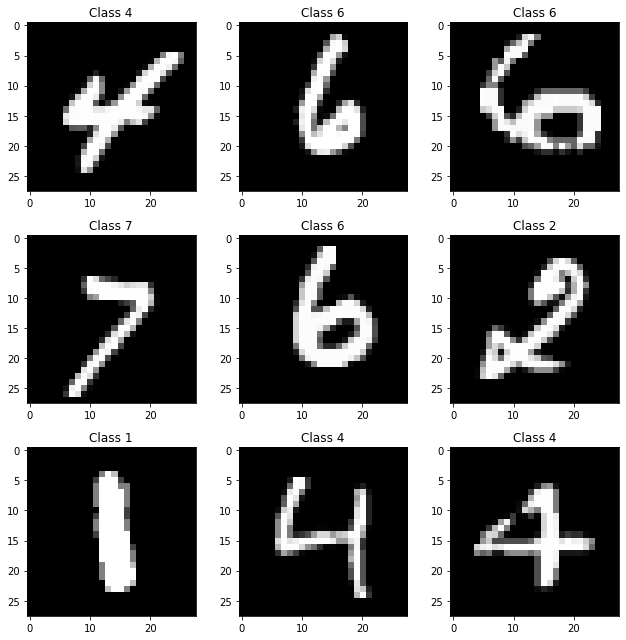

In [38]:
## Checking dataset

plt.rcParams['figure.figsize'] = (9, 9)

for i in range(9):
    plt.subplot(3, 3, i+1)
    number = random.randint(0, len(X_train))
    plt.imshow(X_train[number], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[number]))

plt.tight_layout()

In [39]:
## Examine a single digit closely

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# CopyPaste :)
matprint(X_train[number])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0   28  135  154   20    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0   66  236  254  254  124    0    0    0    0    0    0  0  0  0  0  


In [40]:
## Formatting the input data layer

X_train = X_train.reshape(60000, 784)       # reshaping 60,000 28 x 28 matrices into 60,000 784-length vectors
X_test = X_test.reshape(10000, 784)         # reshaping 10,000 28 x 28 matrices into 10,000 784-length vectors

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255                              # normalizing each value for each pixel for the entire vector for each input!
X_test /= 255

print("Training matrix shape:", X_train.shape)
print("Testing matrix shape:", X_test.shape)

Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


In [41]:
nb_classes = 10                             # number of uniquw digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [42]:
## Building a 3-layer fully connected network (FCN)

model = Sequential()

In [43]:
## First hidden layer

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [44]:
## Second hidden layer

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [45]:
## Final output layer

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [46]:
## Compiling the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [47]:
## Training the model

model.fit(X_train, Y_train, batch_size=150, epochs=50, verbose=1)

Epoch 1/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2569 - accuracy: 0.9227
Epoch 2/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1036 - accuracy: 0.9682
Epoch 3/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0702 - accuracy: 0.9786
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0578 - accuracy: 0.9811
Epoch 5/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0437 - accuracy: 0.9855
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0382 - accuracy: 0.9873
Epoch 7/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0329 - accuracy: 0.9888
Epoch 8/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0315 - accuracy: 0.9897
Epoch 9/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0277 - accuracy: 0.9908
Epoch 10/50
60000/60000 [==============================

In [34]:
## Evaluating model's accuracy on test data

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 20us/step
Test score: 1.8259757514953614
Test accuracy: 0.31220000982284546


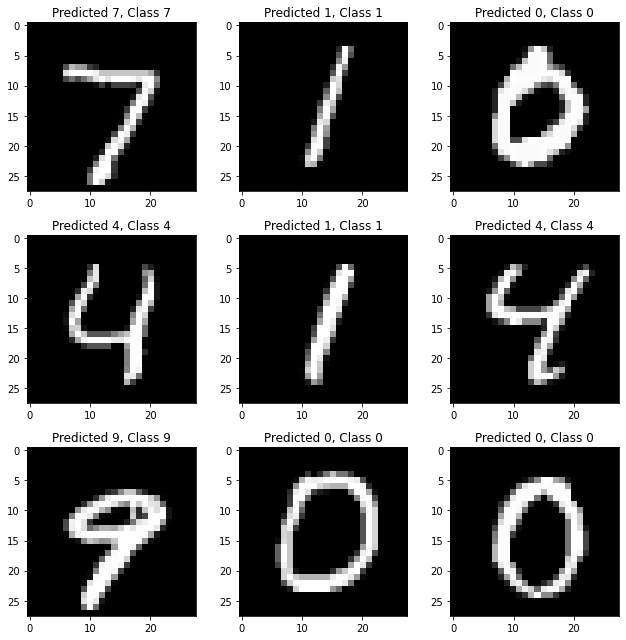

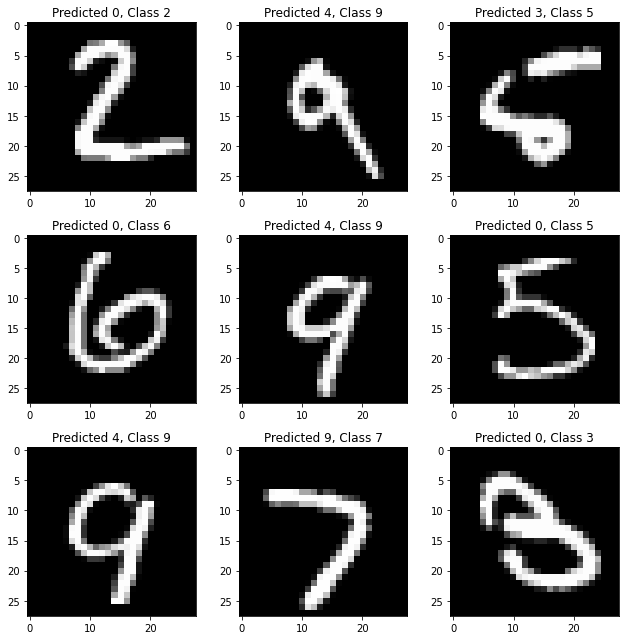

In [35]:
## Inspecting the output

predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()
